# INTRODUCTION 

In this kernel, I have tried to analyze the Heart Disease dataset. The idea is to better understand the relationship of various factors in the dataset that can be related to the heart disease.
This dataset is downloaded from kaggle.The original database contains 76 attributes, but all published experiments refer to using a subset of 14 of them,so we will be using these 14 features for analysing.


### Columns : 

-  <b>age</b>   in years
2. <b>sex</b>          (1 = male; 0 = female)
3. <b>cp</b>           chest pain type
4. <b>trestbps</b>   resting blood pressure (in mm Hg on admission to the hospital)
5. <b>chol</b>         serum cholestoral in mg/dl
6. <b>fbs</b>           (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. <b>restecg</b>    resting electrocardiographic results
8. <b>thalach</b>    maximum heart rate achieved
9. <b>exang</b>      exercise induced angina (1 = yes; 0 = no)
10. <b>oldpeak</b>   ST depression induced by exercise relative to rest
11. <b>slope</b>       the slope of the peak exercise ST segment
12. <b>ca </b>           number of major vessels (0-3) colored by flourosopy
13. <b>thal</b>          3 = normal; 6 = fixed defect; 7 = reversable defect
14. <b>target</b>       1 or 0

### Import the required libraries

In [92]:
import pandas as pd
import matplotlib.pyplot as plt


## 1. Load the dataset

In [94]:
df = pd.read_csv("heart.csv")


Let us take a look at what type of data we are dealing with.


## 2. Understand the data using descriptive Statistics


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.shape

(303, 14)

In [5]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1. There are 303 rows and 14 columns.
2. Each attribute is of int type except the attribute 'oldpeak' which is of float type.
3. We can also see that average age of people in the dataset is near 54 years,whereas minimum age is 29 and maximum age is 77.

let us see if there is any null values in our dataset.

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As we can see that there is no null value present,therefore we can easily use our data for furthur analysis. 

## 3. Understanding the data using Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000126D3142D30>,
      dtype=object)

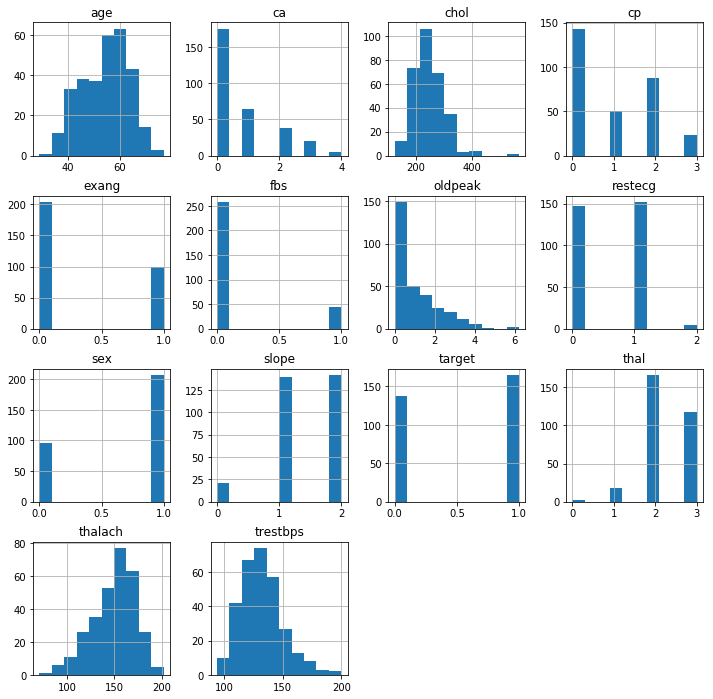

In [9]:
df.hist(figsize=(12,12))

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
trestbps     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chol           AxesSubplot(0.125,0.518913;0.168478x0.16413)
fbs         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
thalach     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
exang          AxesSubplot(0.125,0.321957;0.168478x0.16413)
oldpeak     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
ca          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
thal              AxesSubplot(0.125,0.125;0.168478x0.16413)
target         AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

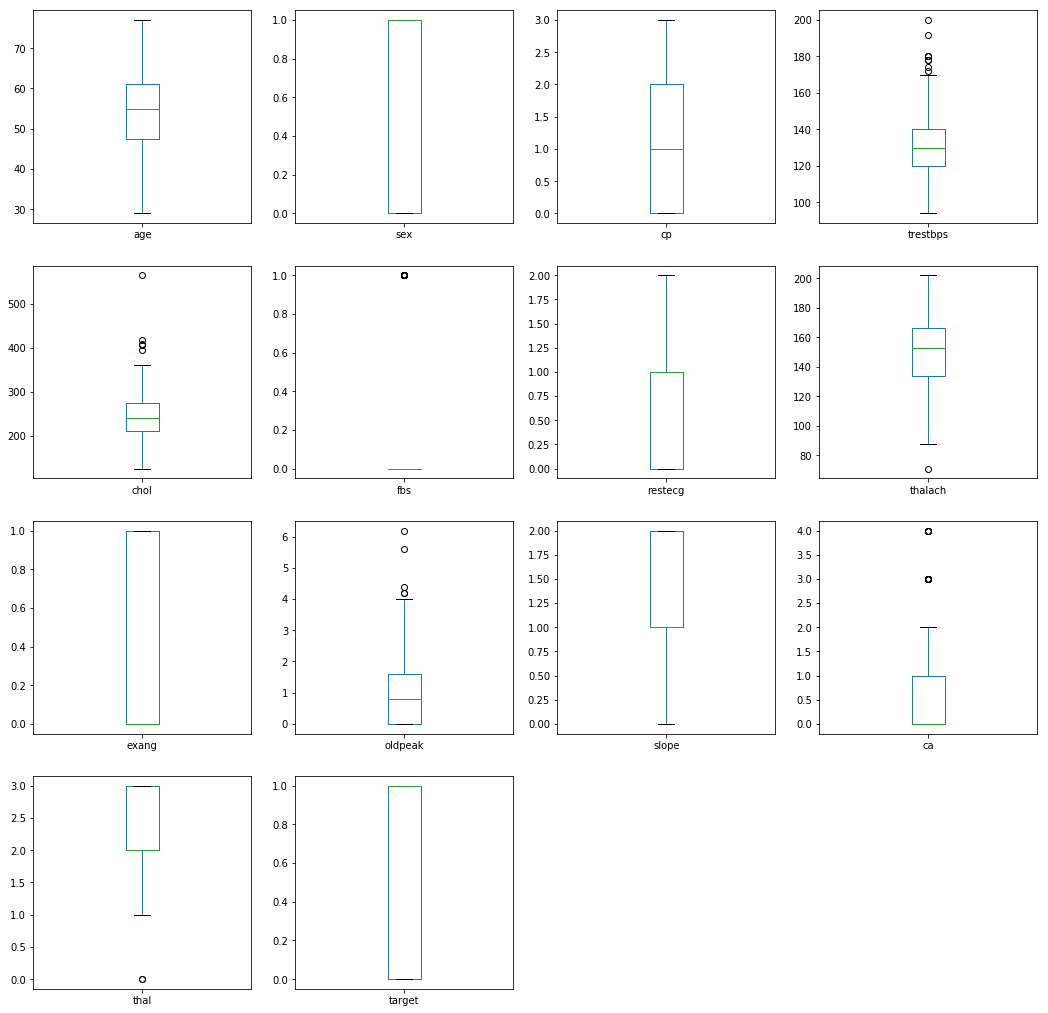

In [10]:
df.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,figsize=(18,18))

Let us see that whether there is any relationship between the attributes.

In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


We cannot get a proper picture with the above analysis, let us draw a correlation graph for our better understanding. 

[Text(0,0,'age'),
 Text(0,0,'sex'),
 Text(0,0,'cp'),
 Text(0,0,'trestbps'),
 Text(0,0,'chol'),
 Text(0,0,'fbs'),
 Text(0,0,'restecg'),
 Text(0,0,'thalach'),
 Text(0,0,'exang'),
 Text(0,0,'oldpeak'),
 Text(0,0,'slope'),
 Text(0,0,'ca'),
 Text(0,0,'thal'),
 Text(0,0,'target')]

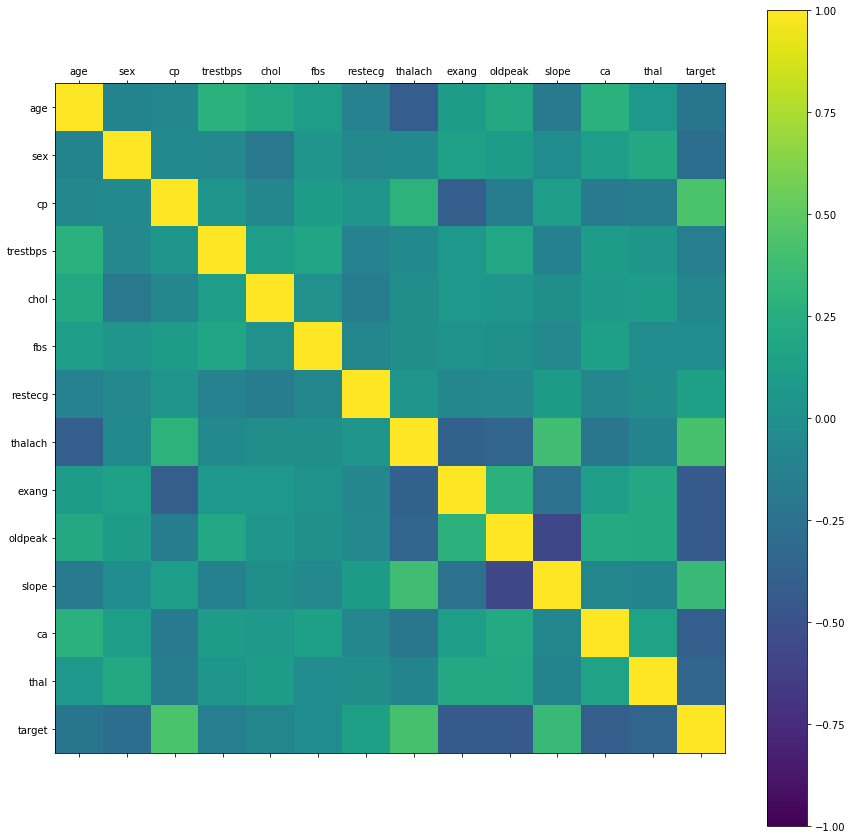

In [12]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111)
cax=ax.matshow(df.corr(),vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)

We can see that the attributes having :

- <b>Positive relationships<b>

chest pain = target<br>
  thalcah = slope<br>
  thalach = target<br>
  slope = target

- <b>Negative relationships<b>

oldpeak =slope<br>
cp = exang<br>
age = thalach


## 4. Furthur analysis

### Let us see that how many people are suffering from heart attack disease

In [13]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

- people free from heart attack disease = 138
- people suffering from heart attack    = 165

In [31]:
p_risk = (len(df.loc[(df['target']==1) ])/len(df.loc[df['target']]))*100
print("Percentage of people at risk : ", p_risk)

Percentage of people at risk :  54.45544554455446


### Now let us see that if the gender of the person can affect him/her.

In [15]:
abc = pd.crosstab(df['sex'],df['target'])
abc

target,0,1
sex,,
0,24,72
1,114,93


- Number of males free from risk   = 114
- Number of females free from risk = 24
- Number of males at risk          = 93
- Number of females at risk        = 72

In [16]:
female_risk_percent = (len(df.loc[((df['sex']==0) & df['target']==1) ])/len(df.loc[df['sex']==0]))*100
male_risk_percent = (len(df.loc[((df['sex']==1) & df['target']==1) ])/len(df.loc[df['sex']==1]))*100
print('percentage males at risk : ',male_risk_percent)
print('percentage females at risk : ',female_risk_percent)

percentage males at risk :  44.927536231884055
percentage females at risk :  75.0


We can see that the females are at greater risk of heart attack than males.
Let us plot the graph between sex and target for a clearer view.

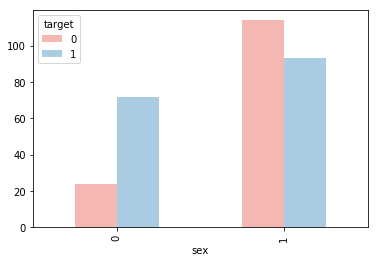

In [17]:
abc.plot(kind='bar', stacked=False, color=['#f5b7b1','#a9cce3'])

### We should also see that how different ages can have the risk of heart attack 

Let us draw a barplot between age and target.

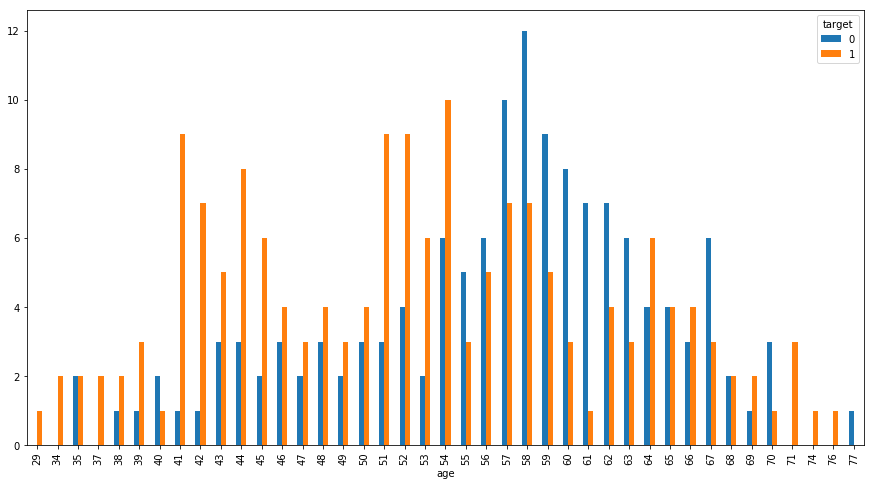

In [18]:
xyz = pd.crosstab(df.age,df.target)
xyz.plot(kind='bar',stacked=False,figsize=(15,8))

We can see that the people between the age of 40 to 55 are at higher risk of heart attack.

### Let us see that how chestpain is related with heart attack.

In [19]:
pqr = pd.crosstab(df.cp,df.target)
pqr

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


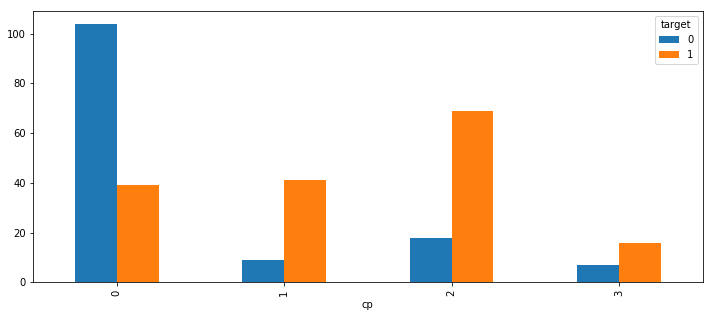

In [20]:
pqr.plot(kind='bar',figsize=(12,5))

We can see that if a person has chest pain type 2 ,then he has higher chance of heart attack and if a person has chest pain type 0 , then he has a very little risk of heart attack.

### See the relationship between thal and risk of heart attack

In [43]:
mno = pd.crosstab(df.thal,df.target)
mno

target,0,1
thal,,
0,1,1
1,12,6
2,36,130
3,89,28


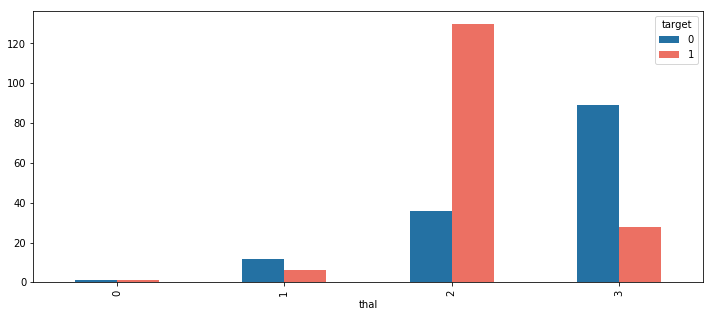

In [49]:
mno.plot(kind='bar', stacked=False, color=['#2471a3','#ec7063'],figsize=(12,5))

We can see that thal type2 can greately increase the risk of heart attack. 


#### We can furthermore analyze the data,but first let us do some feature selection ,create models etc for our data.

### 5. Splitting data into train and test sets.


In [21]:
array = df.values
X = array[:, 0:13]
y = array[:, 13]

seed = 7
tsize = 0.2

We have selected first 13 column as features and 14th column(target) as a label.<br>
We choose target as a label because :<br>
target = 0  &nbsp;&nbsp; risk free of heart attack<br>
target = 1  &nbsp;&nbsp; risk of heart attack
<br>
Now Let Us split our data for further training of our model.

In [22]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=seed)

We divided our data as:<br>
Training data = 80%<br>
Testing data = 20%<br>
<br>

Now Let us preprocess our data.

### 6. Preprocess your data for Machine Learning 

From sklearn,we choose the standard scaler to preprocess our data.<br>
StandardScaler is used to transform attributes with a Gaussian Distribution with each value having mean = 0 and SD = 1 

In [23]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scale)
X_test_scale =scale.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scale)

### 7. Now let us create various models for training our data

### In the below code , I will be using various classification algorithms for training the model.

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [25]:
models=[]
models.append(('LR  :', LogisticRegression()))
models.append(('LDA :', LinearDiscriminantAnalysis()))
models.append(('KNN :', KNeighborsClassifier()))
models.append(('CART:', DecisionTreeClassifier()))
models.append(('NB  :', GaussianNB()))
models.append(('SVM :', SVC()))


In [26]:
results = []
names = []
score = 'accuracy'
seed = 7
folds = 10
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=0.2,random_state=seed)


for name, model in models:
    kfold = KFold(n_splits=folds,random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, scoring=score)
    results.append(cv_results)
    msg ="%s %f (%f)" % (name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)
    

LR  : 84.295267 (0.634574)
LDA : 84.284979 (2.204445)
KNN : 67.345679 (3.016913)
CART: 79.763374 (2.455768)
NB  : 82.242798 (2.467249)
SVM : 56.198560 (0.505321)


### We can see that Linear Discriminant Analysis and Logistic Regression has almost the same accuracy but the Standard deviation of LR is less than LDA so we will use LR for further eximination.
<br>
Let us plot box graph for our different algorithms comparision. 

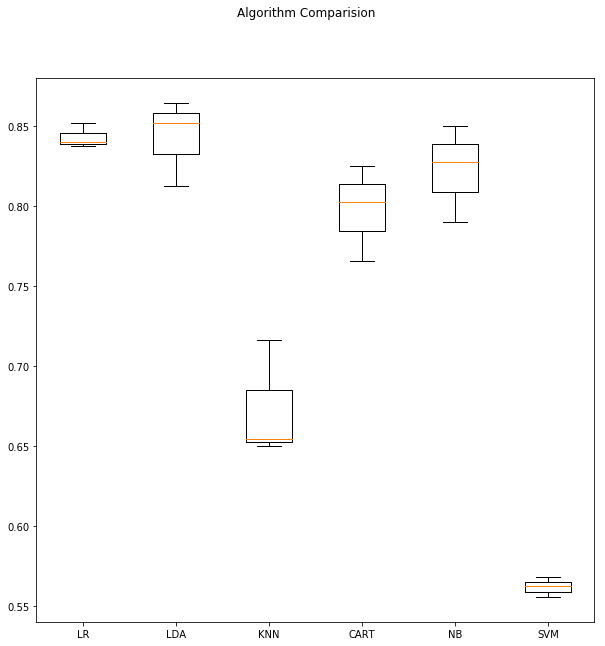

In [27]:
qwerty =['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM'] 

fig = plt.figure(figsize=(10,10))
fig.suptitle("Algorithm Comparision")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(qwerty)
plt.show()

### 8.At Last let us predict out test data on our trained model.

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [91]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_validation)
print(accuracy_score(y_validation, predictions)*100)
print(classification_report(y_validation, predictions))

73.77049180327869
             precision    recall  f1-score   support

        0.0       0.82      0.60      0.69        30
        1.0       0.69      0.87      0.77        31

avg / total       0.75      0.74      0.73        61



We got an overall accuracy of 73.7% for our trained model.


### Eventhough I got a very less accuracy than I expected,I am very happy because this is  the completion of my first project. If you have come this far please upvote and comment so that I can improvee myself. 